<a href="https://colab.research.google.com/github/Hollykid10/Titanic/blob/main/Titanic_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [3]:
titanic = pd.read_csv("train.csv")

In [4]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
titanic.shape

(891, 12)

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
print(titanic.duplicated().any())

False


**Data Preprocessing**

In [9]:
titanic.drop(columns=["Name", "PassengerId", "Cabin", "Ticket"], axis = 1, inplace=True)

In [10]:
print(titanic.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64


In [11]:
# # Replace sex and embarked dtype object to int
# titanic.replace({"Sex":{"male":1, "female":0}, "Embarked":{"C":0, "S":1, "Q":2}}, inplace=True)

In [12]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

**Data Analysis**

In [13]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Survived status of passenger count by Pclass, Sex, Sibsp, Parch, Embarked**

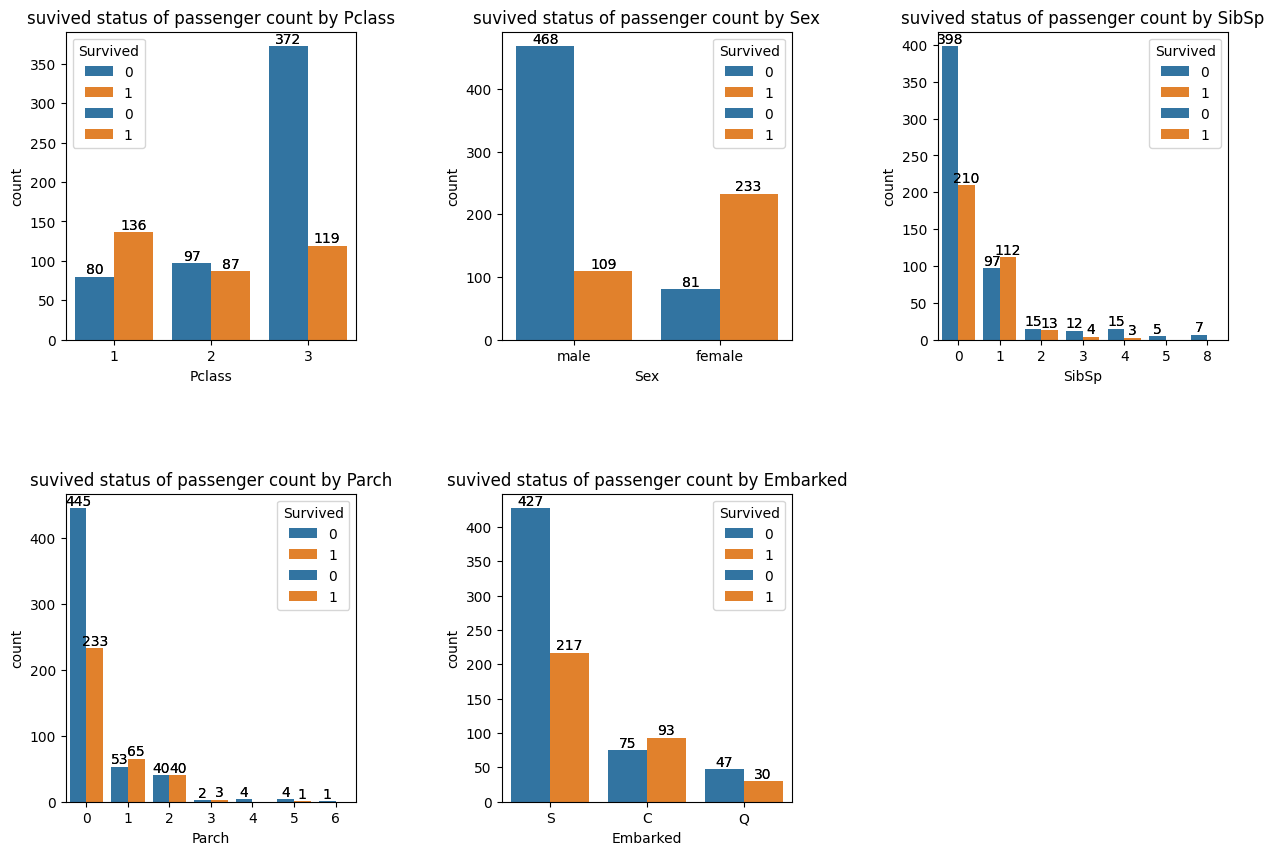

In [14]:
plt.figure(figsize=(15, 10))
n = 0
for i in ["Pclass",	"Sex","SibSp",	"Parch","Embarked"]:
  n += 1
  plt.subplot(2,3, n)
  plt.subplots_adjust(hspace= 0.5, wspace=0.5)
  sns.countplot(data=titanic, x=i, hue="Survived")
  ax = sns.countplot(data=titanic, x=i, hue="Survived")
  plt.title(f"suvived status of passenger count by {i}")
  for container in ax.containers:
    ax.bar_label(container)
plt.show()

**Distribution of all the feature columns**

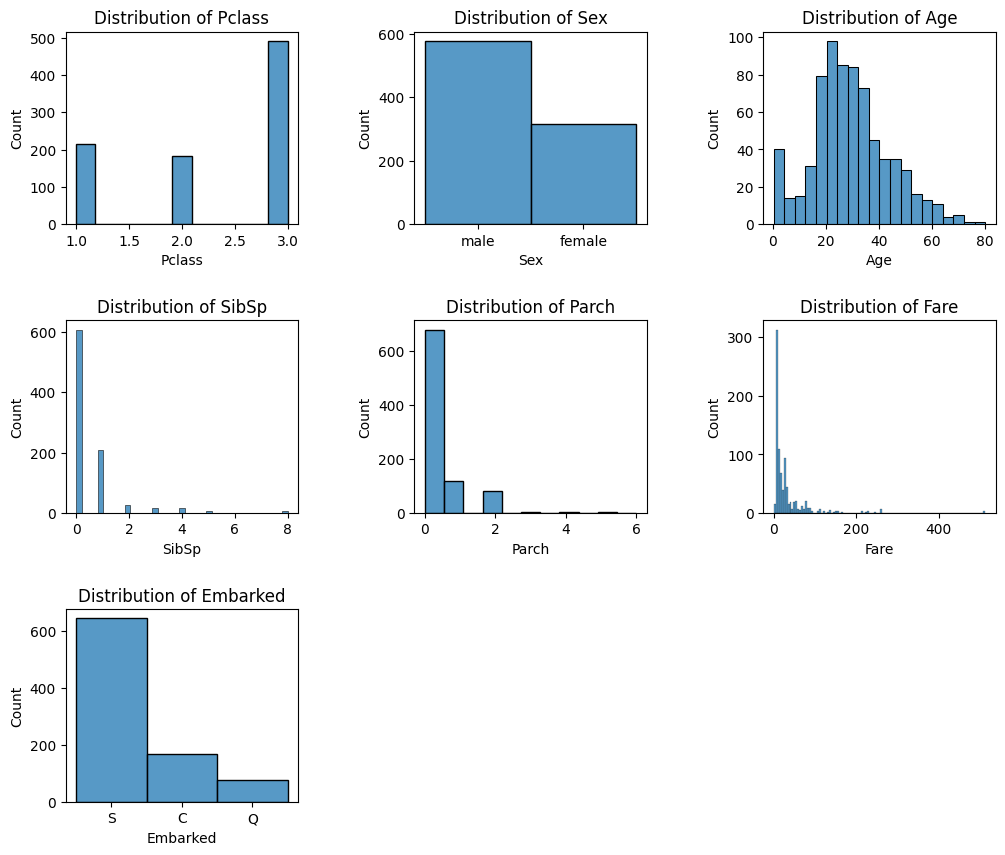

In [15]:
plt.figure(1, figsize=(12, 10))
n = 0
for i in ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']:
  n += 1
  plt.subplot(3,3, n)
  plt.subplots_adjust(hspace=0.5, wspace = 0.5)
  sns.histplot(titanic[i])
  plt.title(f"Distribution of {i}")
plt.show()

**Average fare paid by passenger in different age category**

1.   List item
2.   List item



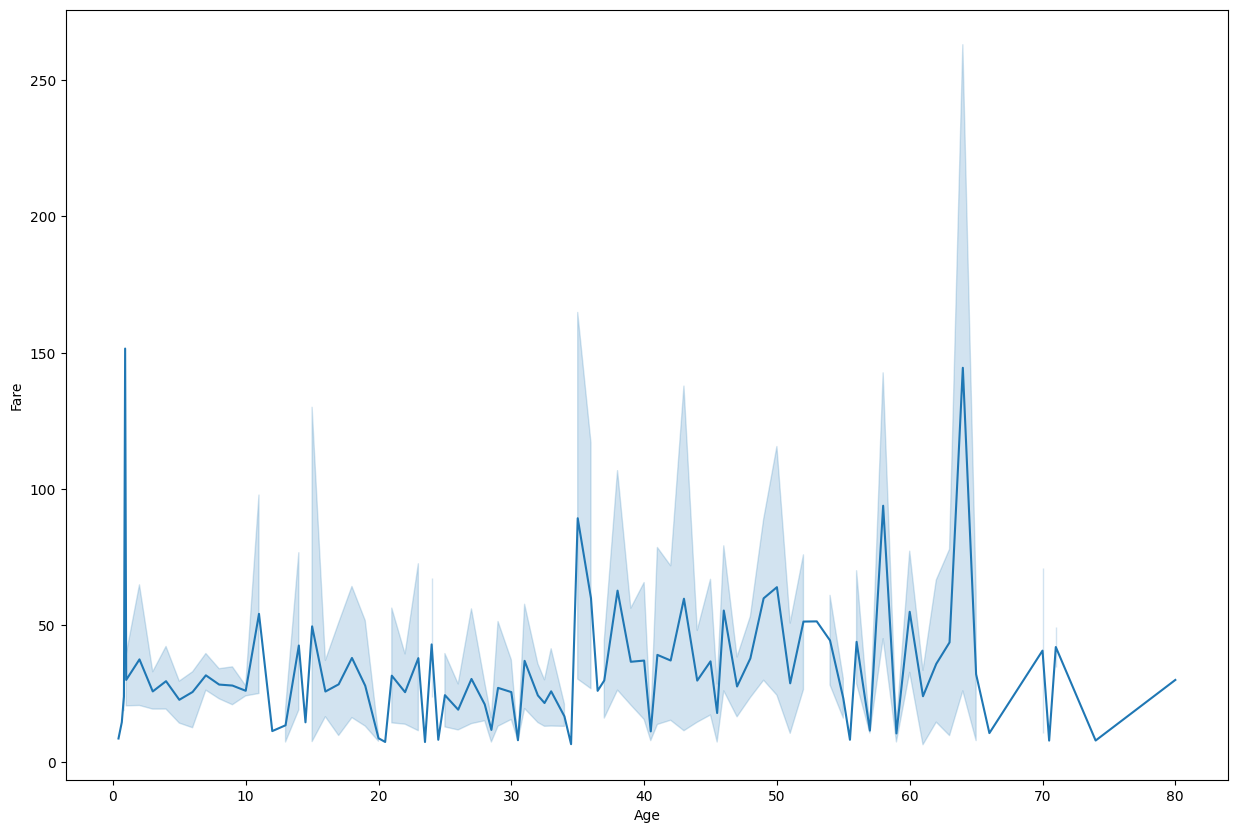

In [16]:
plt.figure(figsize=(15, 10))
sns.lineplot(x = "Age", y="Fare", data=titanic)
plt.show()

**Proportion of passenger that survived by pclass and sex**

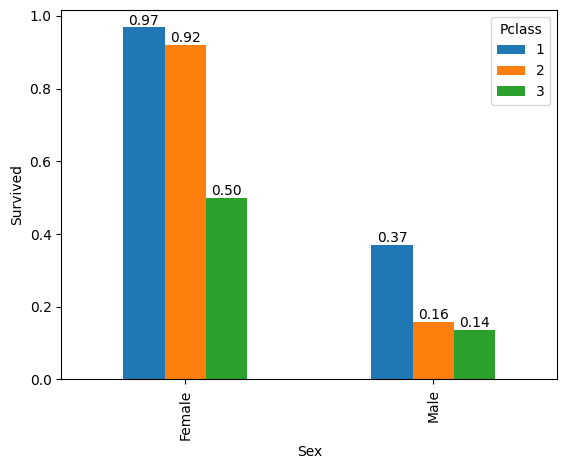

In [17]:
ax = titanic.pivot_table(values="Survived", index="Sex", columns="Pclass").plot.bar()
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f')
plt.xticks(ticks=[0,1], labels=["Female", "Male"])
plt.ylabel("Survived")
plt.show()


The plot above shows that females in first class had an extremely high chance of survival (0.97), followed closely by those in second class (0.92), while third-class females had just a 0.5 chance of survival. In contrast, males had survival rates of 0.37, 0.16, and 0.14 for first, second, and third class, respectively. This strongly indicates that female survival was prioritized during the Titanic disaster, a pattern that is common in many disasters around the world.

**Age distribution of passenger who died vs who survived**

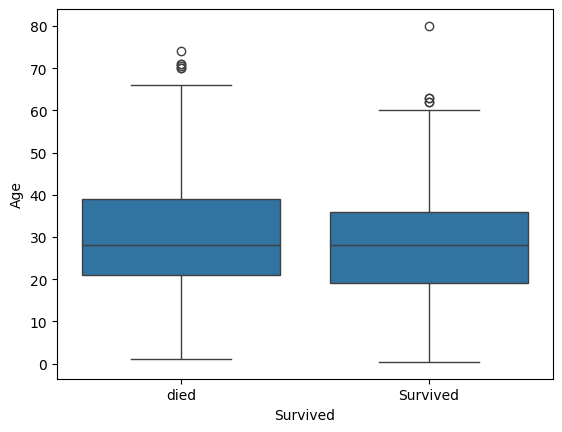

In [18]:
sns.boxplot(data=titanic, y= "Age", x="Survived")
plt.xticks(ticks=[0,1], labels=["died", "Survived"])
plt.show()

**Fare distribution of passenger who died vs who survived**

<function matplotlib.pyplot.show(close=None, block=None)>

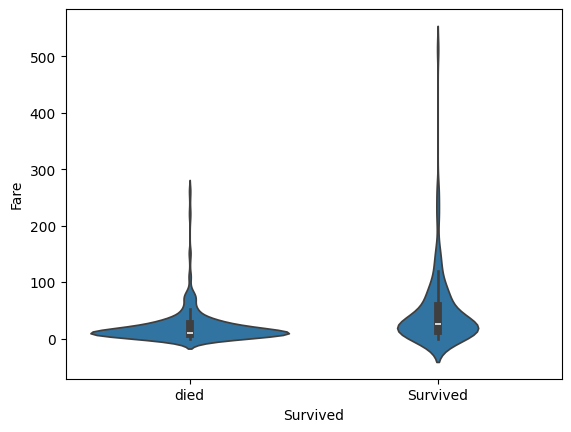

In [19]:
sns.violinplot(data=titanic, y= "Fare", x="Survived")
plt.xticks(ticks=[0,1], labels=["died", "Survived"])
plt.show

**Relationship between Age and fare**

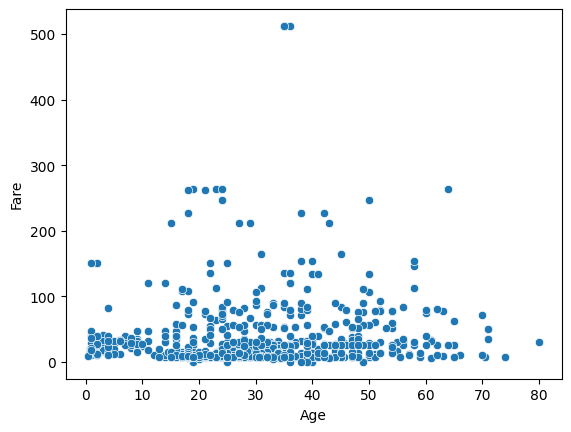

In [20]:
sns.scatterplot(data=titanic, x= "Age", y = "Fare")
plt.show()

**Separate categorical columns from numerical columns**

In [22]:
cat = []
num = []

for column in titanic.columns:
  if titanic[column].nunique() <= 10:
    cat.append(column)
  else:
    num.append(column)

print(f"Categorical : {cat}")
print(f"Numerical : {num}")

Categorical : ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
Numerical : ['Age', 'Fare']


In [23]:
del cat[0]

In [24]:
print(f"Categorical : {cat}")

Categorical : ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']


In [25]:
x = titanic.drop(columns="Survived", axis=1)
y = titanic["Survived"]

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 42)

**Create Pipeline**

In [27]:
from sklearn.pipeline import Pipeline

In [28]:
# Create pipeline for categorical and numerical features
categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy = "most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))

])

In [29]:
numerical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy = "mean"))
])

In [30]:
# Add both pipelines together
combine_pipeline = ColumnTransformer(transformers=[
    ("categorical_variable", categorical_pipeline, cat),
    ("numerical_variable", numerical_pipeline, num)
])

**Compare models with there hyperparameter**

In [31]:
models = {
          "Logistic Regression":(LogisticRegression(max_iter=1000), {
          "classifier__C":[0.001, 0.01, 0.1, 1, 10, 100],
          "classifier__penalty":["l2"]
    }),


        "Random Forest":(RandomForestClassifier(), {
        "classifier__n_estimators":[20, 30, 50],
        "classifier__max_depth":[None, 5, 10, 15, 20],
        "classifier__min_samples_split":[2,5,10],
        "classifier__min_samples_leaf":[1,2,4]

    }),
    "Decision Tree":(DecisionTreeClassifier(), {
        "classifier__max_depth":[None, 5, 10, 15, 20],
        "classifier__min_samples_split":[2,5,10],
        "classifier__min_samples_leaf":[1,2,4]
    }),

          "xgboost":(XGBClassifier(), {
        "classifier__learning_rate":[0.5, 0.1, 0.01, 0.001],
        "classifier__max_depth" : [3, 5, 10, 20],
        "classifier__n_estimators" : [10, 50, 100, 200]
          })


}


**Fit and evaluate our models**

In [32]:

for name, (model, param_grid) in models.items():
    pipeline = Pipeline(steps=[
        ("combine_pipeline", combine_pipeline),
        ("classifier", model)
    ])
    grid = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
    grid.fit(x_train, y_train)

    print(f"{name} best param : ", grid.best_params_)
    print(f"{name} accuracy score : ", grid.best_score_)



Logistic Regression best param :  {'classifier__C': 10, 'classifier__penalty': 'l2'}
Logistic Regression accuracy score :  0.8005515611149414
Random Forest best param :  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 30}
Random Forest accuracy score :  0.8202107751403526
Decision Tree best param :  {'classifier__max_depth': 5, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5}
Decision Tree accuracy score :  0.8047375160051218
xgboost best param :  {'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 50}
xgboost accuracy score :  0.8300403821530582


Choose best model

In [36]:
best_model = XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators = 50)

In [37]:
final_pipeline = Pipeline(steps=[
    ("combine_pipeline", combine_pipeline),
    ("classifier", best_model)
])

In [38]:
final_pipeline.fit(x_train, y_train)

Pipeline(steps=[('combine_pipeline',
                 ColumnTransformer(transformers=[('categorical_variable',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex', 'SibSp',
                                                   'Parch', 'Embarked']),
                                                 ('numerical_variable',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Age', 'Fare'])])),
                ('clas...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=50, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [43]:
# Test prediction and accuracy
from sklearn.metrics import accuracy_score
test_predict = final_pipeline.predict(x_test)
test_accuracy = accuracy_score(test_predict, y_test)
print(test_accuracy)

0.8100558659217877


**Predictive System**

In [50]:
## ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
input_data = (3, "male", 24, 0, 0, 0, "S")
column_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
input_df = pd.DataFrame([input_data], columns = column_names)
prediction = final_pipeline.predict(input_df)
print(prediction)
if prediction[0] == 0:
  print("Unfortunately you did not survived")
else:
  print("You survived")




[0]
Unfortunately you did not survived
